In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [2]:
Pkg.add(["Random","Images","Colors","MAT","LinearAlgebra"])

    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-574-2024/Project.toml`
  No Changes to `~/Documents/programming/BME-574-2024/Manifest.toml`


In [64]:
using Random, Images, Colors, MAT, LinearAlgebra, Statistics, Plots

In [6]:
faces = matread("DATA/allFaces.mat")

Dict{String, Any} with 6 entries:
  "faces"  => [80.0 94.0 … 4.0 4.0; 81.0 87.0 … 4.0 3.0; … ; 14.0 9.0 … 1.0 0.0…
  "m"      => 168.0
  "sub"    => Dict{String, Any}("faces"=>[70.0 84.0 … 4.0 4.0; 74.0 83.0 … 4.0 …
  "nfaces" => [64.0 62.0 … 64.0 64.0]
  "person" => 38.0
  "n"      => 192.0

In [8]:
face_file = matopen("DATA/allFaces.mat")

MAT.MAT_v5.Matlabv5File(IOStream(<file DATA/allFaces.mat>), false, #undef)

In [9]:
keys(face_file)

KeySet for a Dict{String, Int64} with 6 entries. Keys:
  "faces"
  "m"
  "sub"
  "nfaces"
  "person"
  "n"

In [10]:
allfaces = read(face_file,"faces")

32256×2410 Matrix{Float64}:
 80.0  94.0  59.0  16.0  69.0  53.0  …  3.0  3.0  3.0  3.0  3.0  4.0  4.0
 81.0  87.0  67.0  14.0  67.0  52.0     3.0  2.0  3.0  4.0  4.0  4.0  3.0
 80.0  88.0  66.0  14.0  67.0  52.0     3.0  2.0  3.0  4.0  2.0  4.0  4.0
 79.0  87.0  74.0  15.0  69.0  50.0     3.0  4.0  2.0  2.0  3.0  4.0  4.0
 80.0  88.0  75.0  15.0  67.0  53.0     2.0  4.0  4.0  4.0  4.0  4.0  4.0
 82.0  86.0  76.0  15.0  70.0  53.0  …  4.0  4.0  3.0  5.0  3.0  3.0  5.0
 79.0  93.0  85.0  15.0  72.0  57.0     3.0  4.0  3.0  4.0  4.0  3.0  5.0
 80.0  92.0  91.0  17.0  70.0  54.0     3.0  4.0  4.0  3.0  3.0  3.0  4.0
 83.0  90.0  92.0  16.0  68.0  52.0     4.0  4.0  4.0  3.0  3.0  3.0  4.0
 82.0  89.0  92.0  15.0  68.0  52.0     3.0  4.0  3.0  3.0  3.0  3.0  3.0
 78.0  87.0  89.0  16.0  68.0  51.0  …  3.0  4.0  2.0  4.0  3.0  3.0  4.0
 81.0  86.0  88.0  16.0  69.0  51.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 82.0  89.0  91.0  16.0  68.0  51.0     3.0  3.0  2.0  3.0  2.0  3.0  3.0
  ⋮       

In [11]:
faces["m"]

168.0

In [12]:
faces["n"]

192.0

In [153]:
nfaces = Int64.(vec(faces["nfaces"]))

38-element Vector{Int64}:
 64
 62
 64
 64
 62
 64
 64
 64
 64
 64
 60
 59
 60
  ⋮
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64

In [154]:
allPersonIdx = cumsum(nfaces).+1
pushfirst!(allPersonIdx,1)
pop!(allPersonIdx)
allPersonIdx

38-element Vector{Int64}:
    1
   65
  127
  191
  255
  317
  381
  445
  509
  573
  637
  697
  756
    ⋮
 1643
 1707
 1771
 1835
 1899
 1963
 2027
 2091
 2155
 2219
 2283
 2347

In [13]:
168*192

32256

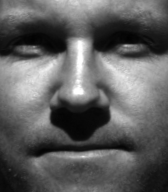

In [26]:
face = reshape(allfaces[:,129],(192,168)) ./ 255
Gray.(face)

In [137]:
different_faces = allfaces[:,allPersonIdx]

32256×38 Matrix{Float64}:
 80.0  86.0  80.0  64.0   10.0  57.0  …  30.0  43.0  71.0  78.0  33.0  70.0
 81.0  79.0  81.0  66.0    7.0  59.0     42.0  44.0  71.0  77.0  33.0  74.0
 80.0  77.0  80.0  66.0    7.0  58.0     60.0  41.0  70.0  76.0  32.0  69.0
 79.0  74.0  79.0  65.0    5.0  60.0     77.0  42.0  69.0  76.0  31.0  72.0
 80.0  72.0  78.0  66.0    5.0  59.0     80.0  44.0  69.0  76.0  30.0  70.0
 82.0  71.0  79.0  65.0    6.0  60.0  …  78.0  46.0  68.0  77.0  31.0  72.0
 79.0  68.0  78.0  66.0   11.0  60.0     82.0  50.0  65.0  78.0  28.0  74.0
 80.0  60.0  78.0  67.0   20.0  61.0     91.0  46.0  65.0  76.0  26.0  71.0
 83.0  59.0  77.0  67.0   28.0  62.0     98.0  47.0  63.0  76.0  25.0  73.0
 82.0  49.0  76.0  63.0   35.0  62.0     97.0  49.0  59.0  77.0  24.0  68.0
 78.0  42.0  78.0  62.0   49.0  60.0  …  93.0  50.0  58.0  74.0  22.0  67.0
 81.0  36.0  78.0  63.0   64.0  60.0     91.0  50.0  53.0  77.0  21.0  69.0
 82.0  38.0  76.0  62.0   69.0  58.0     87.0  49.0  45.0  76.

In [51]:
allPersons = zeros(6*192,6*168)
for i in 0:5
    for j in 0:5
        this_face = reshape(different_faces[:,j+1+6*i],(192,168))
        allPersons[i*192+1:(i+1)*192,j*168+1:(j+1)*168] = this_face
    end
end

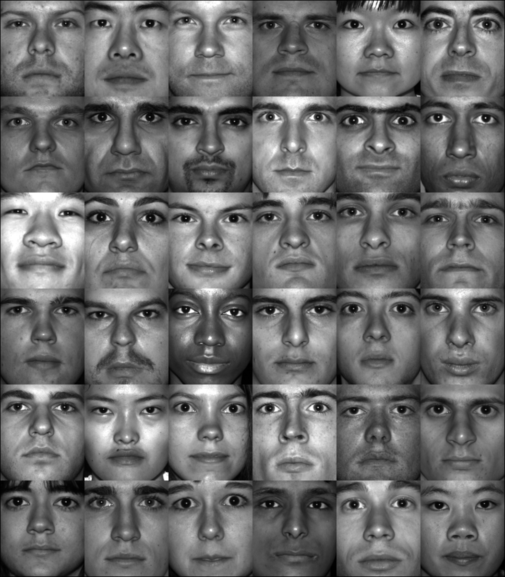

In [52]:
Gray.(allPersons./255)

In [155]:
training_faces = allfaces[:,1:sum(nfaces[1:36])]

32256×2282 Matrix{Float64}:
 80.0  94.0  59.0  16.0  69.0  53.0  …  3.0  2.0  1.0  2.0  1.0  2.0  2.0
 81.0  87.0  67.0  14.0  67.0  52.0     3.0  2.0  0.0  3.0  1.0  2.0  2.0
 80.0  88.0  66.0  14.0  67.0  52.0     2.0  2.0  1.0  2.0  1.0  1.0  3.0
 79.0  87.0  74.0  15.0  69.0  50.0     2.0  3.0  0.0  1.0  1.0  2.0  3.0
 80.0  88.0  75.0  15.0  67.0  53.0     1.0  1.0  1.0  1.0  1.0  2.0  3.0
 82.0  86.0  76.0  15.0  70.0  53.0  …  1.0  2.0  0.0  3.0  1.0  2.0  2.0
 79.0  93.0  85.0  15.0  72.0  57.0     2.0  2.0  1.0  2.0  1.0  2.0  3.0
 80.0  92.0  91.0  17.0  70.0  54.0     3.0  2.0  1.0  2.0  2.0  2.0  2.0
 83.0  90.0  92.0  16.0  68.0  52.0     1.0  2.0  1.0  2.0  1.0  2.0  3.0
 82.0  89.0  92.0  15.0  68.0  52.0     0.0  2.0  1.0  1.0  1.0  2.0  2.0
 78.0  87.0  89.0  16.0  68.0  51.0  …  1.0  1.0  1.0  1.0  2.0  2.0  2.0
 81.0  86.0  88.0  16.0  69.0  51.0     1.0  1.0  1.0  1.0  3.0  2.0  1.0
 82.0  89.0  91.0  16.0  68.0  51.0     1.0  1.0  1.0  1.0  2.0  1.0  2.0
  ⋮       

In [173]:
tf_mean = mean(training_faces,dims=1)
avg_face = mean(training_faces,dims=2)

32256×1 Matrix{Float64}:
 61.452234881682735
 62.011393514461
 62.260297984224366
 62.31551270815074
 62.28834355828221
 62.498685363716035
 62.77256792287467
 63.16432953549518
 63.29184925503944
 63.15731814198072
 62.76950043821209
 62.73312883435583
 62.729184925503944
  ⋮
 43.8216476774759
 42.59859772129711
 42.08238387379492
 41.855828220858896
 41.442156003505694
 40.998685363716035
 40.59465381244522
 41.09509202453988
 41.01095530236635
 41.20464504820333
 41.97589833479404
 42.388255915863276

In [157]:
training_faces_norm = training_faces .- avg_face

32256×2282 Matrix{Float64}:
  18.5478    32.5478   -2.45223  -45.4522  …  -60.4522  -59.4522  -59.4522
  18.9886    24.9886    4.98861  -48.0114     -61.0114  -60.0114  -60.0114
  17.7397    25.7397    3.7397   -48.2603     -61.2603  -61.2603  -59.2603
  16.6845    24.6845   11.6845   -47.3155     -61.3155  -60.3155  -59.3155
  17.7117    25.7117   12.7117   -47.2883     -61.2883  -60.2883  -59.2883
  19.5013    23.5013   13.5013   -47.4987  …  -61.4987  -60.4987  -60.4987
  16.2274    30.2274   22.2274   -47.7726     -61.7726  -60.7726  -59.7726
  16.8357    28.8357   27.8357   -46.1643     -61.1643  -61.1643  -61.1643
  19.7082    26.7082   28.7082   -47.2918     -62.2918  -61.2918  -60.2918
  18.8427    25.8427   28.8427   -48.1573     -62.1573  -61.1573  -61.1573
  15.2305    24.2305   26.2305   -46.7695  …  -60.7695  -60.7695  -60.7695
  18.2669    23.2669   25.2669   -46.7331     -59.7331  -60.7331  -61.7331
  19.2708    26.2708   28.2708   -46.7292     -60.7292  -61.7292  -60.72

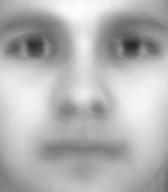

In [174]:
average_face = reshape(mean(training_faces,dims=2),(192,168))
Gray.(average_face)/maximum(avg_face)

In [159]:
u,s,v = svd(training_faces_norm)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
32256×2282 Matrix{Float64}:
  0.000738327  -0.00786972  -0.00223797  …  -0.00354308    0.0115142
  0.00075772   -0.00791867  -0.00224007     -0.00245903   -0.026965
  0.000746465  -0.0079275   -0.00221864     -0.00068296    0.0151463
  0.000768134  -0.00793608  -0.0021385      -0.00121621    0.0365166
  0.000800269  -0.00792212  -0.00204875     -0.00224656   -0.0413023
  0.000837727  -0.00791407  -0.00199053  …  -0.00251391    0.0240225
  0.000856436  -0.00790683  -0.00185653     -0.00146839    0.108666
  0.000876277  -0.00793229  -0.00178057     -0.000822859  -0.0233112
  0.000891413  -0.00794895  -0.00171084      0.000999348   0.00132929
  0.00095969   -0.00792414  -0.00166948      0.00192413   -0.00453217
  0.00100958   -0.00787528  -0.00157672  …   0.000242044  -0.00781169
  0.00106591   -0.00785822  -0.00143112     -0.000723449  -0.0086231
  0.00112169   -0.00784209  -0.00127694      0.000169248   0.00590574
  ⋮    

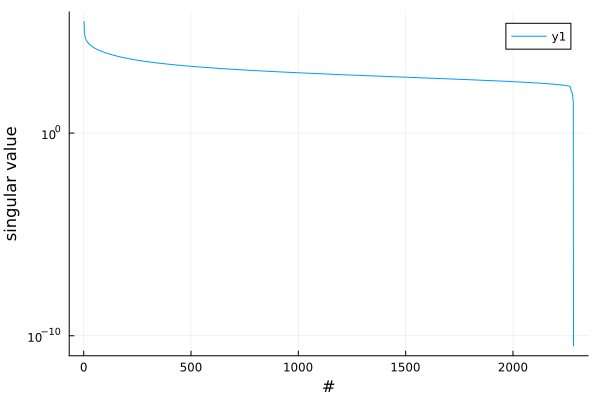

In [160]:
plot(s, xlabel="#", ylabel="singular value",yscale=:log10)

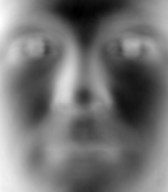

In [161]:
eigenface = reshape(u[:,1],(192,168))
eigenface_scaled = (eigenface .- minimum(eigenface))./(maximum(eigenface)-minimum(eigenface))
Gray.(eigenface_scaled)

In [177]:
test_face_norm = allfaces[:,1+sum(nfaces[1:36])] .- avg_face[:,1]

32256-element Vector{Float64}:
 -28.452234881682735
 -29.011393514461
 -30.260297984224366
 -31.31551270815074
 -32.28834355828221
 -31.498685363716035
 -34.77256792287467
 -37.16432953549518
 -38.29184925503944
 -39.15731814198072
 -40.76950043821209
 -41.73312883435583
 -42.729184925503944
   ⋮
   9.178352322524098
  11.40140227870289
  13.917616126205083
  15.144171779141104
  14.557843996494306
  16.001314636283965
  15.405346187554777
  10.90490797546012
  11.989044697633652
  14.795354951796668
  17.02410166520596
  15.611744084136724

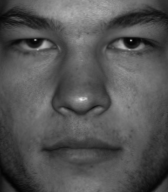

In [172]:
Gray.(reshape(test_face,(192,168)))/255

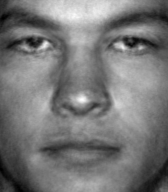

In [188]:
r = 500
test_approx = avg_face[:,1] .+ (u[:,1:r]*u[:,1:r]'*test_face_norm)
Gray.(reshape(test_approx,(192,168))./maximum(test_approx))